### Finding accuracy of clustering algorithm, built-in docker, frontend to display results

In [8]:
import pandas as pd
from pathlib import Path       
import os
os.getcwd()

'c:\\Users\\arunk\\Assignments\\ASSESSMENT COMPLETION\\Machine_learning_Assessment\\Answer_7'

In [115]:
file2 = Path("data.csv")
df = pd.read_csv(file2)
print(df.shape)

(1000, 30)


In [122]:
X= df.drop(columns=['label','filename'])
labels_true= df['label']
labels = labels_true.unique()
map_labels = {}
for i, label in zip(range(0,10),labels):
    map_labels[label] = i

label_df = pd.DataFrame(map_labels.items(),columns=["Labels","y_true"])
label_df.set_index('y_true')

df['label'] = df['label'].map(map_labels)
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int64

In [117]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy import unique

c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_kmeans.p

Estimated number of clusters: 4
Homogeneity: 0.159
Completeness: 0.273
V-measure: 0.201
Adjusted Rand Index: 0.108
Adjusted Mutual Information: 0.195
Silhouette Coefficient: 0.684


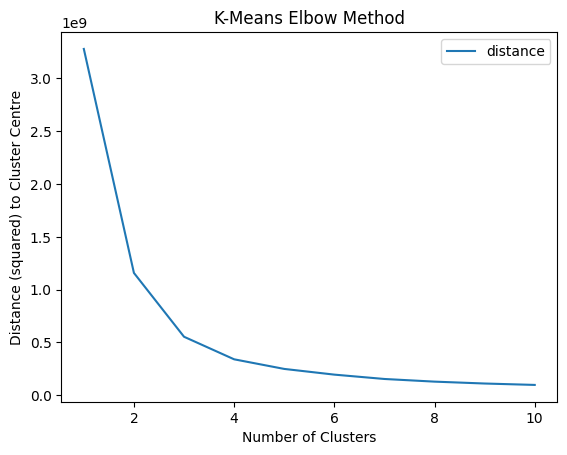

In [254]:
dist_df =[]
for clusters in range (1,11):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(X)
    dist_df.append([clusters,kmeans.inertia_])
dist_df = pd.DataFrame(dist_df,columns=['num_of_clusters','distance'])
dist_df.set_index('num_of_clusters').plot()
plt.xlabel('Number of Clusters')
plt.ylabel('Distance (squared) to Cluster Centre')
plt.title('K-Means Elbow Method')

kmeans = KMeans(n_clusters=4, n_init='auto', max_iter=200, random_state=42,algorithm='elkan')
kmeans.fit(X)
clusters = unique(kmeans.labels_)
cluster_center = kmeans.cluster_centers_
labels = kmeans.labels_
n_clusters_ = len(clusters)
labels_true = df['label']

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)


In [235]:
from numpy import unique
from numpy import where

from sklearn.cluster import Birch

# initialize the data set we'll work with
training_data = X

# define the model
birch_model = Birch(threshold=1000, n_clusters=10)

# train the model
birch_model.fit(training_data)

# assign each data point to a cluster
birch_result = birch_model.predict(training_data)

# get all of the unique clusters
birch_clusters = unique(birch_result)
labels = birch_model.labels_
labels_true = df['label']
n_clusters_ = birch_model.n_clusters
print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)
# birch_model.subcluster_centers_
# birch_model.fit_transform(X=X,y=y)

Estimated number of clusters: 10
Homogeneity: 0.140
Completeness: 0.313
V-measure: 0.194
Adjusted Rand Index: 0.093
Adjusted Mutual Information: 0.189
Silhouette Coefficient: 0.720


c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (3) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


array([[ 1.20123905e+02,  5.79174853e+01,  4.04223375e-01,
         1.38659591e-01,  2.32310501e+03,  2.31835681e+03,
         4.84841812e+03,  1.11106075e-01, -1.11922467e+02,
         9.24625010e+01, -1.44503601e+01,  4.18789479e+01,
        -5.03896864e+00,  1.90847046e+01, -8.07568149e+00,
         1.47596015e+01, -9.20600200e+00,  1.10923437e+01,
        -7.84118388e+00,  7.15456367e+00, -6.62487752e+00,
         3.27453352e+00, -5.35554408e+00,  2.54688634e+00,
        -5.32265265e+00,  1.33733397e+00, -3.31798258e+00,
        -5.98696560e-01],
       [ 1.19819293e+02,  5.61078431e+01,  3.05671579e-01,
         8.90968813e-02,  1.37968016e+03,  1.66153479e+03,
         2.72734236e+03,  6.37761571e-02, -2.43948063e+02,
         1.35517978e+02, -1.14939508e+01,  3.46472033e+01,
         2.32547723e-01,  1.08932427e+01, -5.43838674e+00,
         4.95965838e+00, -7.98806700e+00,  3.59013943e+00,
        -5.85825189e+00,  1.17203481e+00, -3.96663012e+00,
        -1.76373853e-01, -2.88

In [197]:
from numpy import where, unique
import matplotlib.pyplot as pyplot
from sklearn.mixture import GaussianMixture
training_data = X

# define the model
gaussian_model = GaussianMixture(n_components=10)

# train the model
gaussian_model.fit(training_data)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(training_data)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)
log_liklihood = gaussian_model.score(X=X)
gaussian_model.get_params()
gaussian_model.aic(X=X)
gaussian_model.bic(X=X)

n_clusters_ = len(gaussian_clusters)
labels = gaussian_result
labels_true = df['label']

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 10
Homogeneity: 0.199
Completeness: 0.207
V-measure: 0.203
Adjusted Rand Index: 0.090
Adjusted Mutual Information: 0.188
Silhouette Coefficient: 0.336


In [248]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

# initialize the data set we'll work with
training_data = X

# define the model
optics_model = OPTICS(eps=.1, min_samples=11)

# assign each data point to a cluster
optics_result = optics_model.fit_predict(training_data)

# get all of the unique clusters
# optics_clusters = unique(optics_cluster)


unique (optics_result)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [241]:
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# initialize the data set we'll work with
training_data = X

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=30)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit(training_data)

dbscan_result._estimator_type
print("labels : ",unique(dbscan_result.labels_))
dbscan_model.get_params()


labels :  [-1]


{'algorithm': 'auto',
 'eps': 0.25,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 30,
 'n_jobs': None,
 'p': None}

In [189]:
from sklearn.cluster import AffinityPropagation


af = AffinityPropagation(preference=-10, max_iter=300, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)
af.get_params()

Estimated number of clusters: 980
Homogeneity: 0.998
Completeness: 0.334
V-measure: 0.501
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.009
Silhouette Coefficient: 0.032


c:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


{'affinity': 'euclidean',
 'convergence_iter': 15,
 'copy': True,
 'damping': 0.5,
 'max_iter': 300,
 'preference': -10,
 'random_state': 0,
 'verbose': False}

9

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753
[1.03325861 1.15123595]
[ 0.93494652 -0.95302339]
[-1.18459092 -1.11968959]


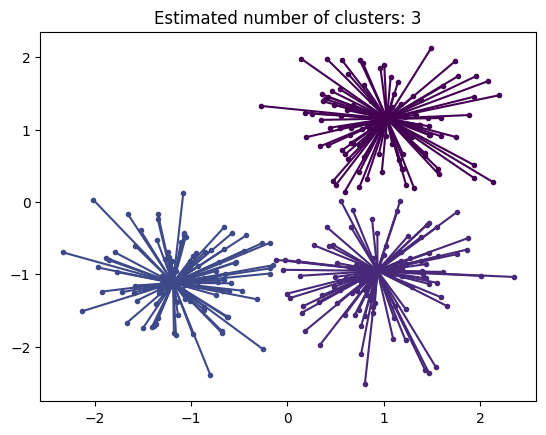

In [91]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)
import matplotlib.pyplot as plt
import numpy as np
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 10)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    print(cluster_center)
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [96]:
len(X)
len(labels_true)
len(labels)
cluster_centers_indices

array([160, 250, 272], dtype=int64)

In [99]:

n_clusters_

3

In [100]:
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    print(cluster_center)

[1.03325861 1.15123595]
[ 0.93494652 -0.95302339]
[-1.18459092 -1.11968959]


In [105]:
X[160]

array([1.03325861, 1.15123595])